## Melakukan Import Library

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import Dataset

Dataset yang digunakan adalah data analisis sentimen tentang masalah setiap maskapai besar AS. Data Twitter diambil dari Februari 2015 dan kontributor diminta untuk mengklasifikasikan tweet positif, negatif, dan netral. Dataset diunduh melalui link "[https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)" yang kemudian disimpan dalam repositori github dengan URL "[https://raw.githubusercontent.com/serinsitio/classtext/main/Tweets.csv](https://raw.githubusercontent.com/serinsitio/classtext/main/Tweets.csv)"

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/serinsitio/classtext/main/Tweets.csv")

t_1 = data[data['airline_sentiment']=='positive']
t_2 = data[data['airline_sentiment']=='negative']
t_3 = data[data['airline_sentiment']=='neutral']
tweets = pd.concat([t_1, t_2, t_3])

In [ ]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York


In [ ]:
tweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14607,569592270866878464,neutral,1.0000,NaN,NaN,American,NaN,WishUpon_26,NaN,0,@AmericanAir i need someone to help me out,NaN,2015-02-22 12:19:14 -0800,KY,Eastern Time (US & Canada)
14611,569591730506371072,neutral,1.0000,NaN,NaN,American,NaN,TrueChief77,NaN,0,"@AmericanAir guarantee no retribution? If so, ...",NaN,2015-02-22 12:17:05 -0800,970 Colorado,NaN
14632,569587813856841728,neutral,0.6760,NaN,0.0,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14639,569587140490866689,neutral,0.6771,NaN,0.0,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
display(tweets.columns)
display(tweets.shape)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

(14640, 15)

Dalam output, Kita melihat ada (14640, 15) yang berarti bahwa dataset kami terdiri dari 14640 baris dan 15 kolom. Namun, di antara kolom, kita hanya tertarik pada kolom “airline_sentiment” yang terdiri dari kategori sentimen sebenarnya, dan kolom “text” yang berisi teks aktual dari tweet tersebut.

## Explorasi Data

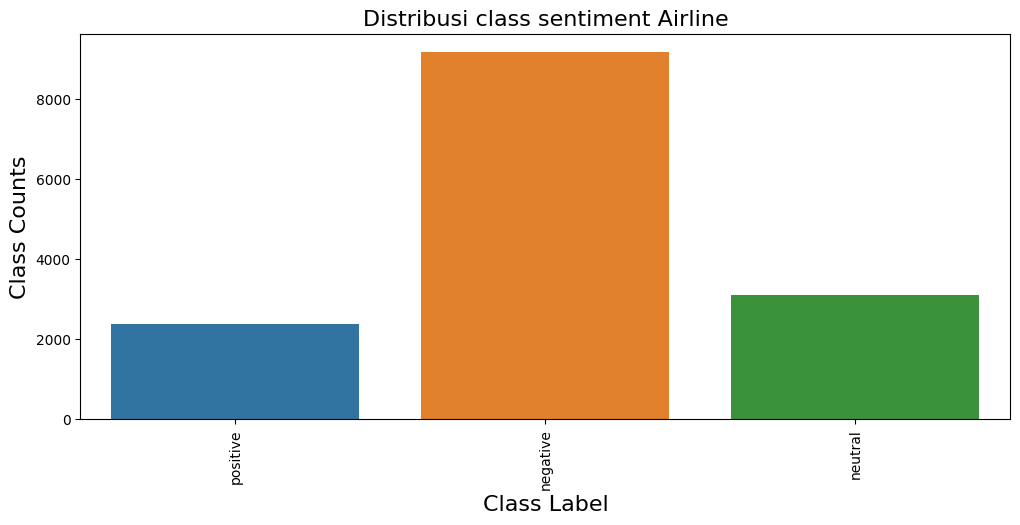

In [ ]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(12,5))
sns.countplot(x='airline_sentiment', data=tweets)
plt.title('Distribusi class sentiment Airline', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

Dari output, Kita dapat melihat bahwa jumlah ulasan negatif jauh lebih tinggi daripada jumlah ulasan positif dan netral.

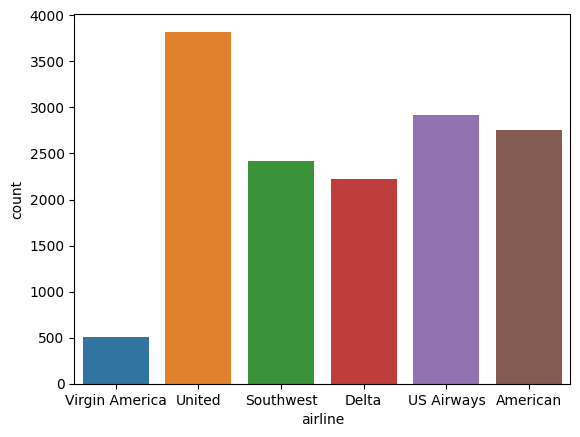

In [ ]:
# Cek Airline yang mendapat review paling tinggi
sns.countplot(x='airline', data=tweets);

Dari output, Kita dapat melihat bahwa Maskapai Penerbangan “United” mendapat jumlah ulasan tertinggi sedangkan “Virgin America” mendapat jumlah ulasan terendah.

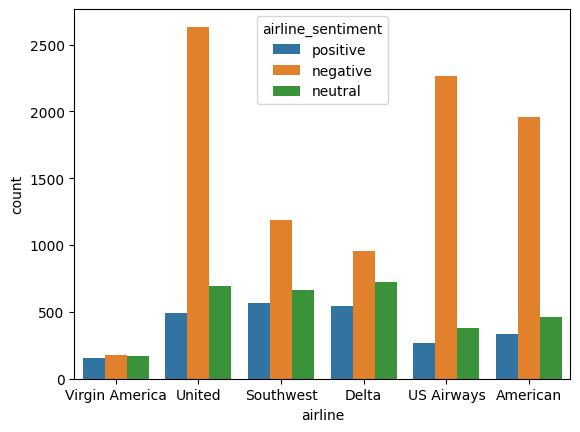

In [ ]:
# Cek jumlah review dari masing-masing Airline yang diterima
sns.countplot(x='airline', hue="airline_sentiment", data=tweets);

Kita dapat melihat bahwa untuk hampir semua maskapai, jumlah ulasan negatif lebih besar daripada ulasan positif dan netral.

## Pemrosesan Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = tweets.iloc[:, 10].values
le = LabelEncoder()
le.fit(["positive", "negative", "neutral"])

print(list(le.classes_))
y = le.transform(tweets.iloc[:, 1].values)

#y = tweets.iloc[:, 1].values
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['negative', 'neutral', 'positive']
(14640,)
@VirginAmerica plus you've added commercials to the experience... tacky.
(14640,)
2


Data cleaning

In [ ]:
# Membuat empty List
processed_tweets = []

for tweet in range(0, len(X)):
    # Hapus semua special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # Hapus semua single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Hapus single characters dari awal
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)

    # Substitusi multiple spaces dengan single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Hapus prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Ubah menjadi Lowercase
    processed_tweet = processed_tweet.lower()

    # Masukkan ke list kosong yang telah dibuat sebelumnya
    processed_tweets.append(processed_tweet)

In [ ]:
# Cek sebelum cleaning data
print(str(X[:5]))
print()

# Cek setelah cleaning data
processed_tweets[:5]

["@VirginAmerica plus you've added commercials to the experience... tacky."
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)'
 "@virginamerica Well, I didn't…but NOW I DO! :-D"
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."
 '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D']



[' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d']

## Skema TF-IDF untuk Pembuatan Feature Numeric

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(processed_tweets).toarray()

## Membagi Data ke Training dan Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

## Pelatihan dan Evaluasi dari Model Klasifikasi Teks

In [ ]:
import time

from sklearn.naive_bayes import GaussianNB
text_classifier_nb = GaussianNB()
t0_nb = time.time()
text_classifier_nb.fit(X_train, y_train)
t1_nb = time.time()

In [ ]:
from sklearn.linear_model import LogisticRegression
text_classifier_lr = LogisticRegression()
t0_lr = time.time()
text_classifier_lr.fit(X_train, y_train)
t1_lr = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
text_classifier_dt = DecisionTreeClassifier()
t0_dt = time.time()
text_classifier_dt.fit(X_train, y_train)
t1_dt = time.time()

In [ ]:
from sklearn.svm import SVC
text_classifier_svml = SVC(kernel='linear')
t0_svml = time.time()
text_classifier_svml.fit(X_train, y_train)
t1_svml = time.time()

In [ ]:
from sklearn.svm import SVC
text_classifier_svmr = SVC(C=10, kernel='rbf', gamma=1)
t0_svmr = time.time()
text_classifier_svmr.fit(X_train, y_train)
t1_svmr = time.time()

In [ ]:
from sklearn.svm import SVC
text_classifier_svmp = SVC(C=10, kernel='poly', degree= 1, gamma=1)
t0_svmp = time.time()
text_classifier_svmp.fit(X_train, y_train)
t1_svmp = time.time()

In [ ]:
predictions_nb = text_classifier_nb.predict(X_test)
t2_nb = time.time()
time_linear_train_nb = t1_nb-t0_nb
time_linear_predict_nb = t2_nb-t1_nb

predictions_lr = text_classifier_lr.predict(X_test)
t2_lr = time.time()
time_linear_train_lr = t1_lr-t0_lr
time_linear_predict_lr = t2_lr-t1_lr

predictions_dt = text_classifier_dt.predict(X_test)
t2_dt = time.time()
time_linear_train_dt = t1_dt-t0_dt
time_linear_predict_dt = t2_dt-t1_dt

predictions_svml = text_classifier_svml.predict(X_test)
t2_svml = time.time()
time_linear_train_svml = t1_svml-t0_svml
time_linear_predict_svml = t2_svml-t1_svml

predictions_svmr = text_classifier_svmr.predict(X_test)
t2_svmr = time.time()
time_linear_train_svmr = t1_svmr-t0_svmr
time_linear_predict_svmr = t2_svmr-t1_svmr

predictions_svmp = text_classifier_svmp.predict(X_test)
t2_svmp = time.time()
time_linear_train_svmp = t1_svmp-t0_svmp
time_linear_predict_svmp = t2_svmp-t1_svmp

# results
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))
print("LR Training time: %fs; Prediction time: %fs" % (time_linear_train_lr, time_linear_predict_lr))
print("DT Training time: %fs; Prediction time: %fs" % (time_linear_train_dt, time_linear_predict_dt))
print("SVM kernel:linear Training time: %fs; Prediction time: %fs" % (time_linear_train_svml, time_linear_predict_svml))
print("SVM kernel:RBF Training time: %fs; Prediction time: %fs" % (time_linear_train_svmr, time_linear_predict_svmr))
print("SVM kernel:polynomial Training time: %fs; Prediction time: %fs" % (time_linear_train_svmp, time_linear_predict_svmp))

NB Training time: 0.301397s; Prediction time: 511.991144s
LR Training time: 16.095783s; Prediction time: 495.901684s
DT Training time: 23.375951s; Prediction time: 472.451578s
SVM kernel:linear Training time: 105.902824s; Prediction time: 388.714098s
SVM kernel:RBF Training time: 265.049186s; Prediction time: 181.923045s
SVM kernel:polynomial Training time: 101.348245s; Prediction time: 99.239515s


## Results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Naive Bayes")
print(confusion_matrix(y_test,predictions_nb))
print("")
print("Logistic Regression")
print(confusion_matrix(y_test,predictions_lr))
print("")
print("Decision Tree")
print(confusion_matrix(y_test,predictions_dt))
print("")
print("Support Vector Machine kernel: linear")
print(confusion_matrix(y_test,predictions_svml))
print("")
print("Support Vector Machine, kernel: rbf")
print(confusion_matrix(y_test,predictions_svml))
print("")
print("Support Vector Machine, kernel: polynomial")
print(confusion_matrix(y_test,predictions_svml))
print("")

print("Naive Bayes")
print(classification_report(y_test,predictions_nb))
print("")
print("Logistic Regression")
print(classification_report(y_test,predictions_lr))
print("")
print("Decision Tree")
print(classification_report(y_test,predictions_dt))
print("")
print("Support Vector Machine kernel: linear")
print(classification_report(y_test,predictions_svml))
print("")
print("Support Vector Machine kernel: rbf")
print(classification_report(y_test,predictions_svmr))
print("")
print("Support Vector Machine kernel: polynomial")
print(classification_report(y_test,predictions_svmp))

Naive Bayes
[[702 496 645]
 [ 38 226 360]
 [ 32  57 372]]

Logistic Regression
[[1708  102   33]
 [ 281  308   35]
 [ 120   56  285]]

Decision Tree
[[1485  252  106]
 [ 291  264   69]
 [ 145   74  242]]

Support Vector Machine kernel: linear
[[1688  114   41]
 [ 261  321   42]
 [ 109   59  293]]

Support Vector Machine, kernel: rbf
[[1688  114   41]
 [ 261  321   42]
 [ 109   59  293]]

Support Vector Machine, kernel: polynomial
[[1688  114   41]
 [ 261  321   42]
 [ 109   59  293]]

Naive Bayes
              precision    recall  f1-score   support

           0       0.91      0.38      0.54      1843
           1       0.29      0.36      0.32       624
           2       0.27      0.81      0.40       461

    accuracy                           0.44      2928
   macro avg       0.49      0.52      0.42      2928
weighted avg       0.68      0.44      0.47      2928


Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.93      0.

## Testing Review

In [ ]:
# Input text
review = "@AmericanAir right on cue with the delays👌"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_nb.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['positive']


# Analisis Misclassified

Data uji

In [ ]:
y_test

array([1, 1, 0, ..., 0, 0, 2])

Hasil prediksi menggunakan SVM kernel: linear

In [ ]:
predictions_svml

array([1, 0, 0, ..., 0, 0, 2])

Hasil prediksi menggunakan SVM kernel: rbf

In [ ]:
predictions_svmr

array([1, 1, 0, ..., 0, 0, 2])

Hasil prediksi menggunakan SVM kernel: polynomial

In [ ]:
predictions_svmp

array([1, 0, 0, ..., 0, 0, 2])

Hasil prediksi menggunakan Naive Bayes

In [ ]:
predictions_nb

array([2, 2, 2, ..., 1, 0, 2])

## Kesimpulan

Sentiment Analysis adalah salah satu tugas utama dalam proses natural language. Untuk menerapkan teknik statistik untuk Sentiment Analysis perlu mengubah teks menjadi angka. Pada pembahasan ini, melihat bagaimana pendekatan TF-IDF dapat digunakan untuk membuat vektor fitur numerik dari teks. Model Sentiment Analysis tertinggi diatas mencapai akurasi sekitar 79 % dan rata-rata waktu eksekusi tercepat untuk prediksi sentimen dengan menggunakan SVM.